<a href="https://colab.research.google.com/github/hannbi/2025ML-CV/blob/main/CV_HW3_hanbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# yolo를 이용한 객체 인식 실습
- YOLOv3 이용 객체 검출 및 인식
- YOLOv10 이용 객체 검출 및 인식
- 동일한 영상에 대해 YOLOv3와 YOLOv10 결과 비교
- 각 객체의 개수와 두 YOLO 버전에 의해 올바로 찾은 객체의 개수를 비교해서 성능 평가 진행


In [ ]:
# 기존 잘못된 yolov3 폴더 제거
!rm -rf /content/yolov3

# 올바른 yolov3 저장소 다시 클론
!git clone https://github.com/ultralytics/yolov3 /content/yolov3

# yolov3 디렉토리로 이동
%cd /content/yolov3

# 필요한 패키지 설치
!pip install -r requirements.txt

Cloning into '/content/yolov3'...
remote: Enumerating objects: 12247, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 12247 (delta 63), reused 40 (delta 39), pack-reused 12148 (from 3)
Receiving objects: 100% (12247/12247), 10.76 MiB | 13.92 MiB/s, done.
Resolving deltas: 100% (8290/8290), done.
/content/yolov3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hanbi_yolo_img.jpg to hanbi_yolo_img.jpg


In [ ]:
!mkdir -p /content/yolov3/inference/images
!mv /content/hanbi_yolo_img.jpg /content/yolov3/inference/images/

In [ ]:
!ls /content/yolov3/inference/images

hanbi_yolo_img.jpg


In [ ]:
%cd /content/yolov3
!python detect.py --weights yolov3.pt --img 640 --conf 0.5 --source inference/images/hanbi_yolo_img.jpg

/content/yolov3
detect: weights=['yolov3.pt'], source=inference/images/hanbi_yolo_img.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-264-g6c16b2b Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients, 155.9 GFLOPs
image 1/1 /content/yolov3/inference/images/hanbi_yolo_img.jpg: 640x480 4 persons, 4 cars, 54.2ms
Speed: 0.5ms pre-process, 54.2ms inference, 152.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


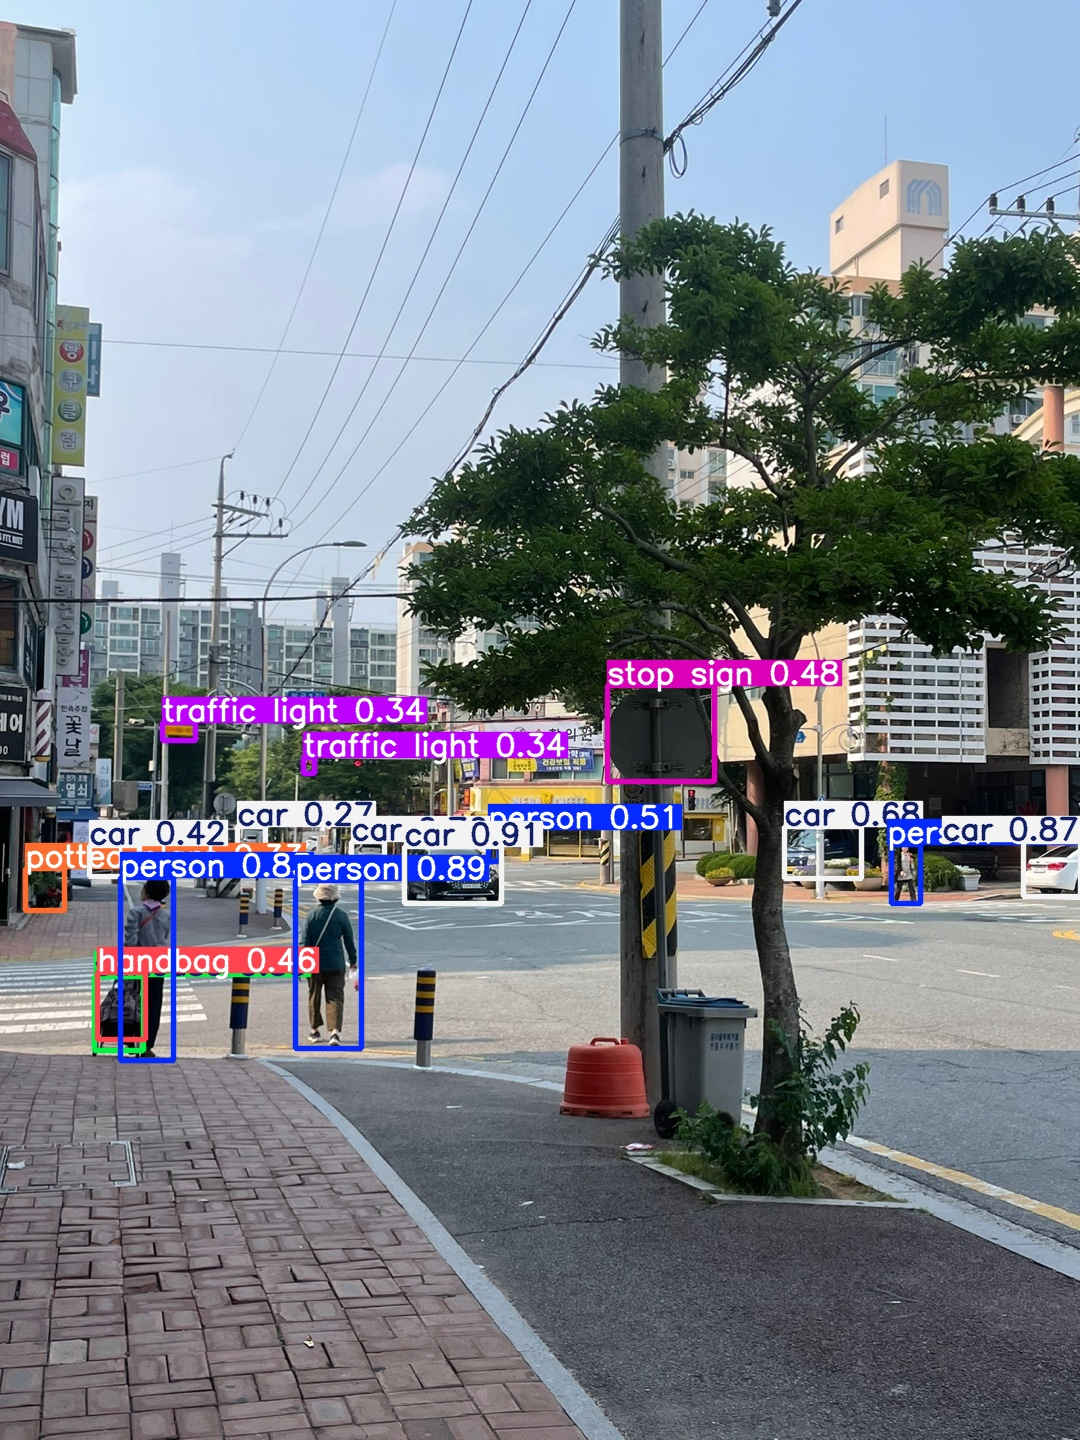

## YOLOv10

In [ ]:
# YOLOv10 환경 설치
%cd /content
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
!pip install -e .

/content
fatal: destination path 'ultralytics' already exists and is not an empty directory.
/content/ultralytics
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.146-0.editable-py3-none-any.whl size=23085 sha256=279c4ce228c2a9d7df57dfe569fdd16b018c583a9301066e72af9d265db46d8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-641vnd_6/wheels/ea/71/6b/a9012dfb148489fd8125c2310e565414c996b3c7721defe799
Successfully built ultralytics
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.146
    Uninstalling ultralytics-8.3.146:
      Successfully uninstalled ultralytics-8.3.146


In [ ]:
!cp /content/yolov3/inference/images/hanbi_yolo_img.jpg /content/ultralytics/ # 동일 이미지 복사(YOLOv10 폴더)

In [ ]:
!yolo detect predict model=yolov10n.pt source=hanbi_yolo_img.jpg conf=0.5 save=True # YOLOv10 실행

100% 5.59M/5.59M [00:00<00:00, 69.9MB/s]
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,299,264 parameters, 0 gradients, 6.7 GFLOPs

image 1/1 /content/yolov3/hanbi_yolo_img.jpg: 640x480 2 persons, 2 cars, 38.5ms
Speed: 8.8ms preprocess, 38.5ms inference, 21.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


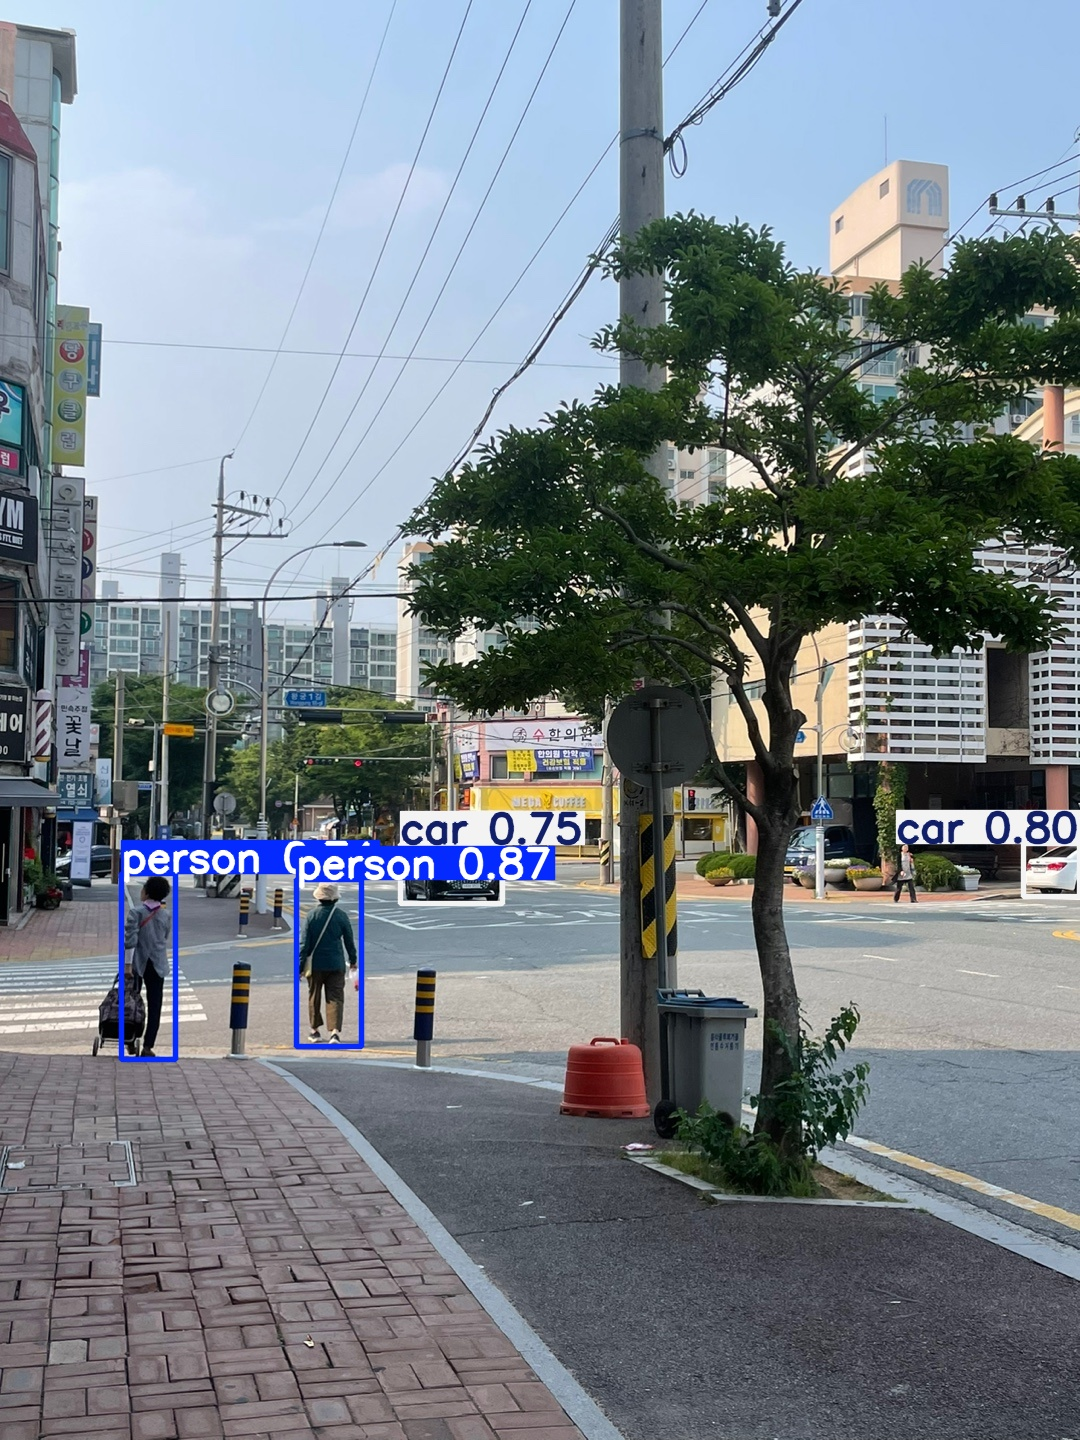

In [ ]:
from PIL import Image
from IPython.display import display
display(Image.open('/content/ultralytics/runs/detect/predict/hanbi_yolo_img.jpg'))